## Дисклеймер

В этом упражнении вам предлагается построить классификатор на наборе данных, полученных Национальным институтом диабета, болезней органов пищеварения и почек (National Institute of Diabetes and Digestive and Kidney Diseases). Цель состоит в том, чтобы ответить на вопрос: есть ли у пациента диабет, основываясь на определенных диагностических измерениях, включенных в набор данных, который получен из исходной базы данных наложением нескольких ограничений. В частности, в рассматриваемых в задании данных, все пациенты — женщины не менее 21 года индийского происхождения Пима.  
  
[Набор данных](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) состоит из таких предикторов, как количество беременностей у пациентки, индекс массы тела, уровень инсулина, возраст и так далее. Отклик принимает два значение — больна (1) диабетом или нет (0).  
  
В задачах используйте реализацию ДПР из библиотеки *sklearn*:  

In [158]:
from sklearn.tree import DecisionTreeClassifier

При обучении используйте параметры, указанные в вашем варианте, например:

*DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20, max_leaf_nodes=30, random_state=2020)*  
  
Для визуализации дерева принятия решений можете воспользоваться библиотекой *graphviz* и кодом (где x — тренировочный набор данных, clf — обученное ДПР):

In [159]:
'''
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)
'''

"\nfrom sklearn.tree import export_graphviz\nimport graphviz\ncolumns = list(x.columns)\nexport_graphviz(clf, out_file='tree.dot', \n                feature_names=columns,\n                class_names=['0', '1'],\n                rounded = True, proportion = False, \n                precision = 2, filled = True, label='all')\n\nwith open('tree.dot') as f:\n    dot_graph = f.read()\n\ngraphviz.Source(dot_graph)\n"

## Задание

1. Скачайте исходный набор данных и отделите от него первые 620 строк.

Введите число строк в получившейся выборке относящихся к классу 0 (пациент не болен диабетом).

In [160]:
from pandas import Series, DataFrame
import pandas as pd

allData = pd.read_csv("drive/MyDrive/data/diabetes.csv", delimiter=',', decimal='.')
data = allData.loc[:619]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [161]:
print(data[data.Outcome == 0].shape[0])

404


2. Разделите полученную выборку на тренировочную и тестовую части, в отношении 80/20 (первые 80% строк — тренировочный набор данных, остальные 20% — тестовый). Предикторами служат столбцы Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age. Отклик — Outcome.

In [162]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data.drop(columns = "Outcome"), data.Outcome, test_size = 0.2, shuffle = False)

3. Обучите классификатор используя DecisionTreeClassifier с параметрами criterion='entropy', max_leaf_nodes = 15, min_samples_leaf = 10 и random_state = 2020.

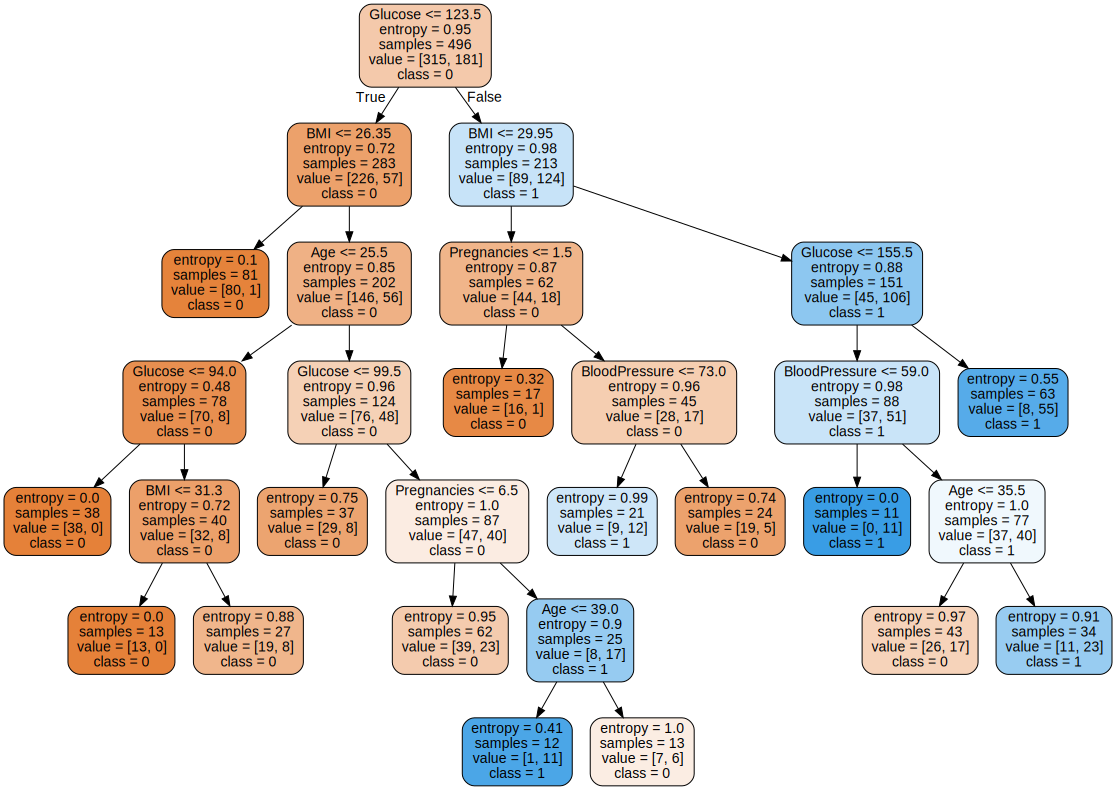

In [163]:
dct = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_leaf_nodes=15, random_state=2020)
dct.fit(trainX, trainY)

#visualize
from sklearn.tree import export_graphviz
import graphviz
columns = list(trainX.columns)
export_graphviz(dct, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

4. Изучите получившееся дерево принятия решений.

Введите глубину дерева:

In [164]:
print(dct.get_depth())

6


По какому предиктору выполнено разделение на последнем уровне дерева принятия решений (если таких узлов несколько, введите название любого из них):

In [165]:
print("Age")

Age


Введите значение разделения для указанного предиктора с точностью до сотых:

In [166]:
print(39.0)

39.0


5. Оцените модель с помощью тестовых данных.

In [167]:
predY = dct.predict(testX)

Введите долю правильных ответов:

In [168]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(testY, predY), 2))

0.85


Введите среднее значение метрик $F_1$ (Macro-F1):

In [169]:
from sklearn.metrics import f1_score

print(round(f1_score(testY, predY, average='macro'), 2))

0.8


6. Выполните предсказание для пациентов 754, 756, 759, 721 (указаны номера строк, нумерация с нуля) из начального набора данных.

In [170]:
patientsId = [721, 754, 756, 759]

for id in patientsId:
    print("Prediction for the patient №%d: %d"%(id, dct.predict(allData.drop(columns = "Outcome").loc[id].to_numpy().reshape(1, -1))[0]))

Prediction for the patient №721: 0
Prediction for the patient №754: 1
Prediction for the patient №756: 1
Prediction for the patient №759: 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
